### **Climacell Project**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from env import key, client
import datetime
from datetime import date
import json

**Real Time Climate Data**

In [2]:
# This request is the San Antonio Botanical Garden. It returns realtime data for the identified fields.
response = client.realtime(lat= 29.4576, lon=98.4587, fields=['precipitation', 'temp', 'humidity', 'wind_speed', 'cloud_cover'])
# Returns status code (Query Successful or Not)
print(response.status_code)
# Create df of results to visualize
data = response.json()
df = pd.DataFrame(data)
df.head()

200


,lat,lon,temp,wind_speed,humidity,precipitation,cloud_cover,observation_time
value,29.4576,98.4587,11.63,3.63,56.81,0,0,2020-10-26T13:19:53.754Z
units,29.4576,98.4587,C,m/s,%,mm/hr,%,NaN


**Historical Climate Data**

In [3]:
# First you need to formatt the date correctly
def date_in_java():
    #import datetime
    now = datetime.datetime.now()
    iso_time = now.strftime("%Y-%m-%dT%H:%M:%SZ") 
    return iso_time


In [4]:
date = date_in_java()
date


'2020-10-26T08:19:53Z'

In [5]:
'2020-06-22T20:47:00Z'

'2020-06-22T20:47:00Z'

In [6]:
# This request is the San Antonio Botanical Garden. It returns historical data for the identified fields.
response = client.historical_climacell(lat= 29.4576, lon=98.4587, timestep = 30, start_time = '2020-10-25T14:45:09Z', end_time ='now', fields=["feels_like", "dewpoint", "wind_direction", 
                                                            "wind_gust", "baro_pressure", "precipitation", 
                                                            "precipitation_type","temp", "humidity", 
                                                            "wind_speed", "cloud_cover","visibility",
                                                            "cloud_base", "cloud_ceiling"])                                                                                                                 
# Returns status code (Query Successful or Not)
print(response.status_code)
# Create df of results to visualize
data = response.json()

200


In [7]:
df.head()

,lat,lon,temp,wind_speed,humidity,precipitation,cloud_cover,observation_time
value,29.4576,98.4587,11.63,3.63,56.81,0,0,2020-10-26T13:19:53.754Z
units,29.4576,98.4587,C,m/s,%,mm/hr,%,NaN


### International Space Station (# of People Currently In Space)

In [8]:
response = requests.get('http://api.open-notify.org/astros.json')
# Will Request Be Sucessful
response.status_code

200

In [9]:
# Print Response
print(response.json())

{'message': 'success', 'people': [{'name': 'Sergey Ryzhikov', 'craft': 'ISS'}, {'name': 'Kate Rubins', 'craft': 'ISS'}, {'name': 'Sergey Kud-Sverchkov', 'craft': 'ISS'}], 'number': 3}


In [10]:
# Function to dump response in to a formatted string

import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "message": "success",
    "number": 3,
    "people": [
        {
            "craft": "ISS",
            "name": "Sergey Ryzhikov"
        },
        {
            "craft": "ISS",
            "name": "Kate Rubins"
        },
        {
            "craft": "ISS",
            "name": "Sergey Kud-Sverchkov"
        }
    ]
}


### International Space Station (When Space Station Will Pass Over San Antonio)

In [11]:
# parameters (location) as a dictionary:
parameters = {
    "lat": 29.4576,
    "lon": 98.4587
}
# respons in json
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)
# jprint function produces a clean json response
jprint(response.json())

{
    "message": "success",
    "request": {
        "altitude": 100,
        "datetime": 1603718394,
        "latitude": 29.4576,
        "longitude": 98.4587,
        "passes": 5
    },
    "response": [
        {
            "duration": 539,
            "risetime": 1603740242
        },
        {
            "duration": 639,
            "risetime": 1603745981
        },
        {
            "duration": 406,
            "risetime": 1603751949
        },
        {
            "duration": 90,
            "risetime": 1603763970
        },
        {
            "duration": 555,
            "risetime": 1603769627
        }
    ]
}


#### Extract the Passtimes

In [12]:
pass_times = response.json()['response']
jprint(pass_times)

[
    {
        "duration": 539,
        "risetime": 1603740242
    },
    {
        "duration": 639,
        "risetime": 1603745981
    },
    {
        "duration": 406,
        "risetime": 1603751949
    },
    {
        "duration": 90,
        "risetime": 1603763970
    },
    {
        "duration": 555,
        "risetime": 1603769627
    }
]


#### Next we’ll use a loop to extract just the five risetime values: 

In [13]:
risetimes = []

for d in pass_times:
    time = d['risetime']
    risetimes.append(time)

print(risetimes)

[1603740242, 1603745981, 1603751949, 1603763970, 1603769627]


#### These times are difficult to understand – they are in a format known as timestamp or epoch. Essentially the time is measured in the number of seconds since January 1st 1970. We can use the Python datetime.fromtimestamp() method to convert these into easier to understand times:

In [14]:
from datetime import datetime

times = []

for rt in risetimes:
    time = datetime.fromtimestamp(rt)
    times.append(time)
    print(time)

2020-10-26 14:24:02
2020-10-26 15:59:41
2020-10-26 17:39:09
2020-10-26 20:59:30
2020-10-26 22:33:47


### Timeseries Exercises

In [15]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [16]:
df.isna().sum()

temp    0
date    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [18]:
# 1st Step Sort Index
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [19]:
# 2nd Step use function .resample()
df = df.resample('M').mean()
df

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


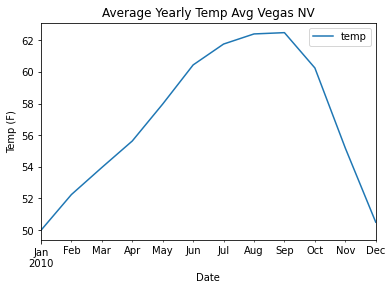

In [20]:
# 3rd Step: Visualize Data
df.plot()
plt.title("Average Yearly Temp Avg Vegas NV")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

In [21]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# 1st Step Sort Index
df = df.set_index('date').sort_index()
# Sorting by min_value ** Remove Reset Index in order to resample **
d = {'min':'min_value'}
df = df.groupby('date')['temp'].agg([min]).rename(columns=d)
# Resample by month
min_temp_df = df.resample('M').min()
min_temp_df

,min_value
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-06-30,53.7
2010-07-31,55.4
2010-08-31,56.6
2010-09-30,56.4


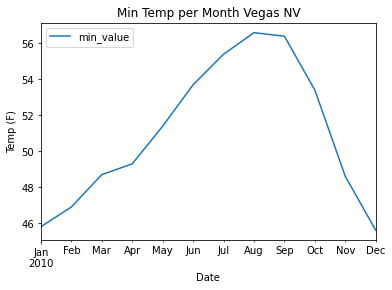

In [22]:
# Visualize Min Temps
min_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Min Temp per Month Vegas NV")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time. 

In [23]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Sorting by max_value ** Remove Reset Index in order to resample **
d = {'max':'max_value'}
df = df.groupby('date')['temp'].agg([max]).rename(columns=d)
# Resample by month
max_temp_df = df.resample('M').max()
max_temp_df

,max_value
date,
2010-01-31,56.2
2010-02-28,58.6
2010-03-31,61.3
2010-04-30,64.3
2010-05-31,66.4
2010-06-30,69.7
2010-07-31,70.4
2010-08-31,72.2
2010-09-30,72.2


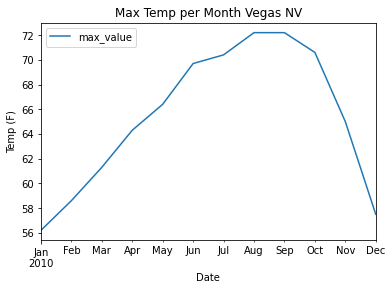

In [24]:
# Visualize Min Temps
max_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Max Temp per Month Vegas NV")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()